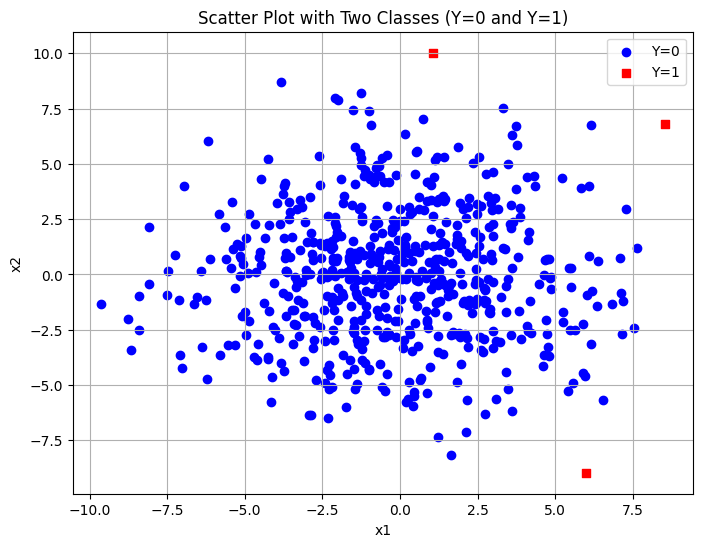

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 600 random points centered at (0, 0) with variance 10
np.random.seed(0)
num_points = 600
mean = 0
variance = 10
x1 = np.random.normal(mean, np.sqrt(variance), num_points)
x2 = np.random.normal(mean, np.sqrt(variance), num_points)

# Calculate distances from the origin
distances = np.sqrt(x1**2 + x2**2)

# Assign labels Y=0 for points within distance 10, Y=1 for the rest
Y = np.where(distances < 10, 0, 1)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x1[Y==0], x2[Y==0], color='blue', marker='o', label='Y=0')
plt.scatter(x1[Y==1], x2[Y==1], color='red', marker='s', label='Y=1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot with Two Classes (Y=0 and Y=1)')
plt.legend()
plt.grid()
plt.show()




Step 1. generate 600 random points centered at (0,0) with variance 10, Y=0 for points in distance less than 4 and Y=1 for the rest. scatter plot

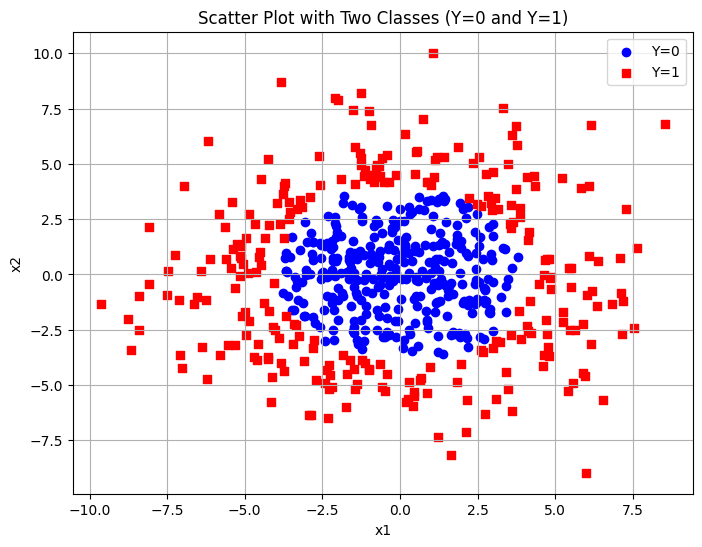

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 600 random points centered at (0, 0) with variance 10
np.random.seed(0)
num_points = 600
mean = 0
variance = 10
x1 = np.random.normal(mean, np.sqrt(variance), num_points)
x2 = np.random.normal(mean, np.sqrt(variance), num_points)

# Calculate distances from the origin
distances = np.sqrt(x1**2 + x2**2)

# Assign labels Y=0 for points within distance 5, Y=1 for the rest
Y = np.where(distances < 4, 0, 1)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x1[Y==0], x2[Y==0], color='blue', marker='o', label='Y=0')
plt.scatter(x1[Y==1], x2[Y==1], color='red', marker='s', label='Y=1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot with Two Classes (Y=0 and Y=1)')
plt.legend()
plt.grid()
plt.show()


Step 1. generate 600 random points centered at (0,0) with variance 10, Y=0 for points in distance less than 4 and Y=1 for the rest. scatter plot

Step 2. make x3=f(x1, x2) where f is a gaussian function. scatter plot 3d (x1,x2,x3)  with Y color

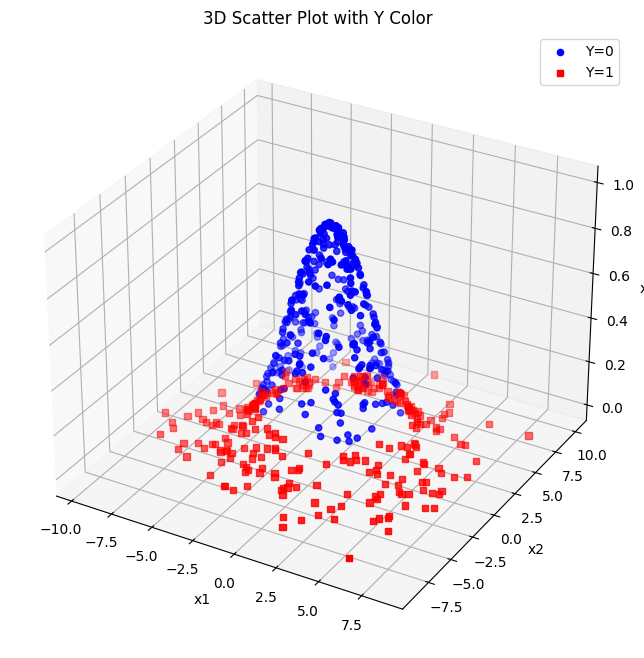

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate 600 random points centered at (0, 0) with variance 10
np.random.seed(0)
num_points = 600
mean = 0
variance = 10
x1 = np.random.normal(mean, np.sqrt(variance), num_points)
x2 = np.random.normal(mean, np.sqrt(variance), num_points)

# Calculate distances from the origin
distances = np.sqrt(x1**2 + x2**2)

# Assign labels Y=0 for points within distance 4, Y=1 for the rest
Y = np.where(distances < 4, 0, 1)

# Step 2: Calculate x3 as a Gaussian function of x1 and x2
def gaussian_function(x1, x2):
    return np.exp(-0.1 * (x1**2 + x2**2))

x3 = gaussian_function(x1, x2)

# Create 3D scatter plot with Y as color
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1[Y==0], x2[Y==0], x3[Y==0], c='blue', marker='o', label='Y=0')
ax.scatter(x1[Y==1], x2[Y==1], x3[Y==1], c='red', marker='s', label='Y=1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D Scatter Plot with Y Color')
ax.legend()
plt.show()


Step 1. generate 600 random points centered at (0,0) with variance 10, Y=0 for points in distance less than 4 and Y=1 for the rest. scatter plot

Step 2. make x3=f(x1, x2) where f is a gaussian function. scatter plot 3d (x1,x2,x3)  with Y color

step 3: make a linear hyperplan (use light blue color) that can separate the points of Y=0, Y=1

c:\python36\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



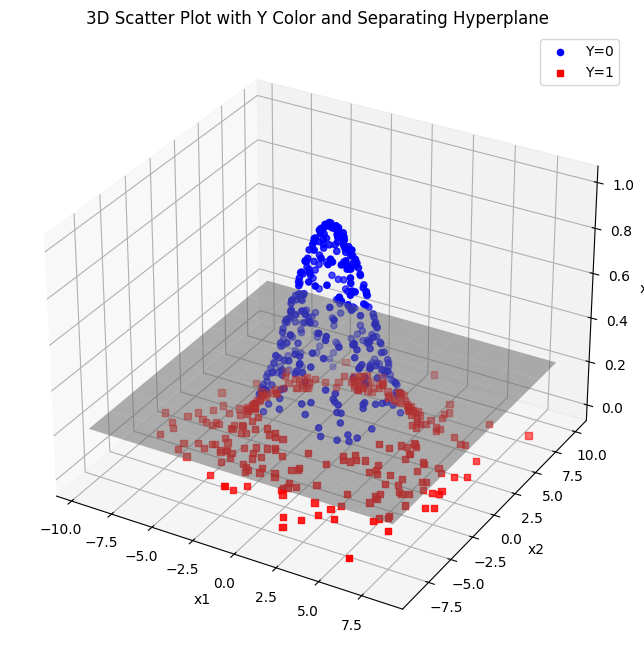

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC

# Step 1: Generate 600 random points centered at (0, 0) with variance 10
np.random.seed(0)
num_points = 600
mean = 0
variance = 10
x1 = np.random.normal(mean, np.sqrt(variance), num_points)
x2 = np.random.normal(mean, np.sqrt(variance), num_points)

# Calculate distances from the origin
distances = np.sqrt(x1**2 + x2**2)

# Assign labels Y=0 for points within distance 4, Y=1 for the rest
Y = np.where(distances < 4, 0, 1)

# Step 2: Calculate x3 as a Gaussian function of x1 and x2
def gaussian_function(x1, x2):
    return np.exp(-0.1 * (x1**2 + x2**2))

x3 = gaussian_function(x1, x2)

# Step 3: Train a LinearSVC to find a separating hyperplane
X = np.column_stack((x1, x2, x3))
clf = LinearSVC(random_state=0, max_iter=10000)
clf.fit(X, Y)
coef = clf.coef_[0]
intercept = clf.intercept_

# Create 3D scatter plot with Y as color and the separating hyperplane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1[Y==0], x2[Y==0], x3[Y==0], c='blue', marker='o', label='Y=0')
ax.scatter(x1[Y==1], x2[Y==1], x3[Y==1], c='red', marker='s', label='Y=1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D Scatter Plot with Y Color and Separating Hyperplane')
ax.legend()

# Create a meshgrid to plot the separating hyperplane
xx, yy = np.meshgrid(np.linspace(min(x1), max(x1), 10),
                     np.linspace(min(x2), max(x2), 10))
zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)

plt.show()


c:\python36\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\python36\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\v52no\AppData\Local\Temp\ipykernel_73328\594175426.py:64: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



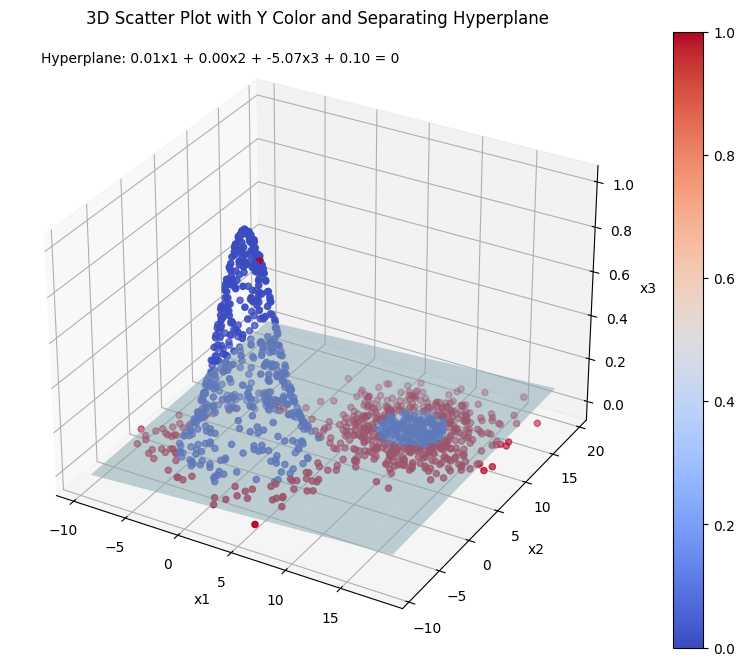

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC

# Step 1: Generate 600 random points centered at C1=(0,0) with variance 10
np.random.seed(0)
num_points = 600
mean = 0
variance = 10
c1_x = np.random.normal(mean, np.sqrt(variance), num_points)
c1_y = np.random.normal(mean, np.sqrt(variance), num_points)

# Calculate distances from C1
distances_c1 = np.sqrt(c1_x**2 + c1_y**2)

# Assign labels Y=0 for points within distance 6 from C1, Y=1 for the rest
Y_c1 = np.where(distances_c1 < 6, 0, 1)

# Step 2: Generate another dataset centered at C2=(10,10) with variance 10
c2_x = np.random.normal(10, np.sqrt(variance), num_points)
c2_y = np.random.normal(10, np.sqrt(variance), num_points)

# Calculate distances from C2
distances_c2 = np.sqrt((c2_x - 10)**2 + (c2_y - 10)**2)

# Assign labels Y=0 for points within distance 3 from C2, Y=1 for the rest
Y_c2 = np.where(distances_c2 < 3, 0, 1)

# Combine the two datasets
x1 = np.concatenate((c1_x, c2_x))
x2 = np.concatenate((c1_y, c2_y))
Y = np.concatenate((Y_c1, Y_c2))

# Step 3: Calculate x3 using a Gaussian function
def gaussian_function(x1, x2):
    return np.exp(-0.1 * (x1**2 + x2**2))

x3 = gaussian_function(x1, x2)

# Step 4: Train a LinearSVC to find a separating hyperplane
X = np.column_stack((x1, x2, x3))
clf = LinearSVC(random_state=0, max_iter=10000)
clf.fit(X, Y)
coef = clf.coef_[0]
intercept = clf.intercept_

# Create 3D scatter plot with Y as color and the separating hyperplane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x1, x2, x3, c=Y, cmap=plt.cm.coolwarm)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D Scatter Plot with Y Color and Separating Hyperplane')

# Create a meshgrid to plot the separating hyperplane
xx, yy = np.meshgrid(np.linspace(min(x1), max(x1), 10),
                     np.linspace(min(x2), max(x2), 10))
zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]
ax.plot_surface(xx, yy, zz, color='lightblue', alpha=0.5)

# Display the equation of the hyperplane
equation = f'Hyperplane: {float(coef[0]):.2f}x1 + {float(coef[1]):.2f}x2 + {float(coef[2]):.2f}x3 + {float(intercept):.2f} = 0'
ax.text2D(0.05, 0.95, equation, transform=ax.transAxes)

# Display the plot
plt.colorbar(scatter)
plt.show()



give me python code for :

Step 1. generate 600 random points centered at C1=(0,0) with variance 10, Y=0 for points in distance to C1 less than 6 and Y=1 for the rest. scatter plot
Step 2 generate another random points centered at (10,10) with variance 10, Y=0 for points in distance to C2 less than 3 and Y=1 for the rest. scatter plot
Step 3. make x3=f(x1, x2) where f is a gaussian function. scatter plot 3d (x1,x2,x3) with Y color

step 4: make a linear hyperplan (use light blue color) that can separate the points of Y=0, Y=1

c:\python36\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\python36\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



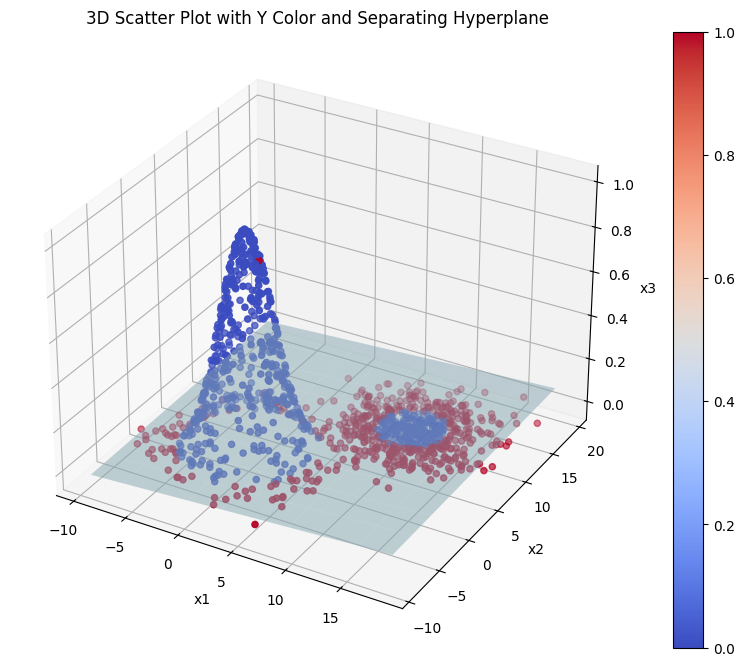

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC

# Step 1: Generate 600 random points centered at C1=(0,0) with variance 10
np.random.seed(0)
num_points = 600
mean = 0
variance = 10
c1_x = np.random.normal(mean, np.sqrt(variance), num_points)
c1_y = np.random.normal(mean, np.sqrt(variance), num_points)

# Calculate distances from C1
distances_c1 = np.sqrt(c1_x**2 + c1_y**2)

# Assign labels Y=0 for points within distance 6 from C1, Y=1 for the rest
Y_c1 = np.where(distances_c1 < 6, 0, 1)

# Step 2: Generate another dataset centered at C2=(10,10) with variance 10
c2_x = np.random.normal(10, np.sqrt(variance), num_points)
c2_y = np.random.normal(10, np.sqrt(variance), num_points)

# Calculate distances from C2
distances_c2 = np.sqrt((c2_x - 10)**2 + (c2_y - 10)**2)

# Assign labels Y=0 for points within distance 10 from C2, Y=1 for the rest
Y_c2 = np.where(distances_c2 < 3, 0, 1)

# Combine the two datasets
x1 = np.concatenate((c1_x, c2_x))
x2 = np.concatenate((c1_y, c2_y))
Y = np.concatenate((Y_c1, Y_c2))

# Step 3: Calculate x3 using a Gaussian function
def gaussian_function(x1, x2):
    return np.exp(-0.1 * (x1**2 + x2**2))

x3 = gaussian_function(x1, x2)

# Step 4: Train a LinearSVC to find a separating hyperplane
X = np.column_stack((x1, x2, x3))
clf = LinearSVC(random_state=0, max_iter=10000)
clf.fit(X, Y)
coef = clf.coef_[0]
intercept = clf.intercept_

# Create 3D scatter plot with Y as color and the separating hyperplane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x1, x2, x3, c=Y, cmap=plt.cm.coolwarm)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D Scatter Plot with Y Color and Separating Hyperplane')

# Create a meshgrid to plot the separating hyperplane
xx, yy = np.meshgrid(np.linspace(min(x1), max(x1), 10),
                     np.linspace(min(x2), max(x2), 10))
zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]
ax.plot_surface(xx, yy, zz, color='lightblue', alpha=0.5)

# Display the plot
plt.colorbar(scatter)
plt.show()


In [31]:
import numpy as np
import plotly.graph_objects as go
from sklearn.svm import LinearSVC

# Step 1: Generate data for C1
np.random.seed(0)
num_points = 600
mean = 0
variance = 10
c1_x = np.random.normal(mean, np.sqrt(variance), num_points)
c1_y = np.random.normal(mean, np.sqrt(variance), num_points)

# Calculate distances from C1
distances_c1 = np.sqrt(c1_x**2 + c1_y**2)

# Assign labels Y=0 for points within distance 6 from C1, Y=1 for the rest
Y_c1 = np.where(distances_c1 < 6, 0, 1)

# Step 2: Generate data for C2
c2_x = np.random.normal(10, np.sqrt(variance), num_points)
c2_y = np.random.normal(10, np.sqrt(variance), num_points)

# Calculate distances from C2
distances_c2 = np.sqrt((c2_x - 10)**2 + (c2_y - 10)**2)

# Assign labels Y=0 for points within distance 8 from C2, Y=1 for the rest
Y_c2 = np.where(distances_c2 < 8, 0, 1)

# Combine the two datasets
x1 = np.concatenate((c1_x, c2_x))
x2 = np.concatenate((c1_y, c2_y))
Y = np.concatenate((Y_c1, Y_c2))

# Step 3: Calculate x3 using a Gaussian function
def gaussian_function(x1, x2):
    return np.exp(-0.1 * (x1**2 + x2**2))

x3 = gaussian_function(x1, x2)

# Step 4: Train a LinearSVC to find a separating hyperplane
X = np.column_stack((x1, x2, x3))
clf = LinearSVC(random_state=0, max_iter=10000)
clf.fit(X, Y)
coef = clf.coef_[0]
intercept = clf.intercept_

# Create a 3D scatter plot with Plotly
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=x1, y=x2, z=x3, mode='markers',
                           marker=dict(size=5, color=Y, colorscale='Viridis', opacity=0.7)))

# Create a meshgrid to plot the separating hyperplane
xx, yy = np.meshgrid(np.linspace(min(x1), max(x1), 10),
                     np.linspace(min(x2), max(x2), 10))
zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]

fig.add_trace(go.Surface(x=xx, y=yy, z=zz, colorscale='Blues', opacity=0.5))

# Customize layout
fig.update_layout(scene=dict(xaxis_title='x1', yaxis_title='x2', zaxis_title='x3'),
                  title='3D Scatter Plot with Y Color and Separating Hyperplane')

# Display the plot
fig.show()


c:\python36\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\python36\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

